In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from xgcm import Grid

In [2]:
ds_seq0=xr.open_dataset('seq0.nc')
ds_seq2=xr.open_dataset('seq2.nc')
ds_seq3=xr.open_dataset('seq3.nc')
ds_scurl0=xr.open_dataset('scurl0.nc')
ds_eq0=xr.open_dataset('eq0.nc')
ds_eq2=xr.open_dataset('eq2.nc')
ds_eq3=xr.open_dataset('eq3.nc')
ds_curl0=xr.open_dataset('curl0.nc')

In [3]:
ds_stats1 = xr.open_dataset('/media/mesomiso/T7 Shield/Code/with_precip/ocean_geometry.nc', decode_times=False)
ds_stats1 = ds_stats1.rename({'lath' : 'yh','lonh' : 'xh','latq' : 'yq','lonq' : 'xq'}) #renaming the coords to align with the original dataset
grid1 = Grid(ds_seq0, coords= {'X':{'center':'xh','outer':'xq'}, 'Y':{'center':'yh','outer':'yq'}, 'Z':{'center':'zl','outer':'zi'}},periodic=['X'])

# Depth Space

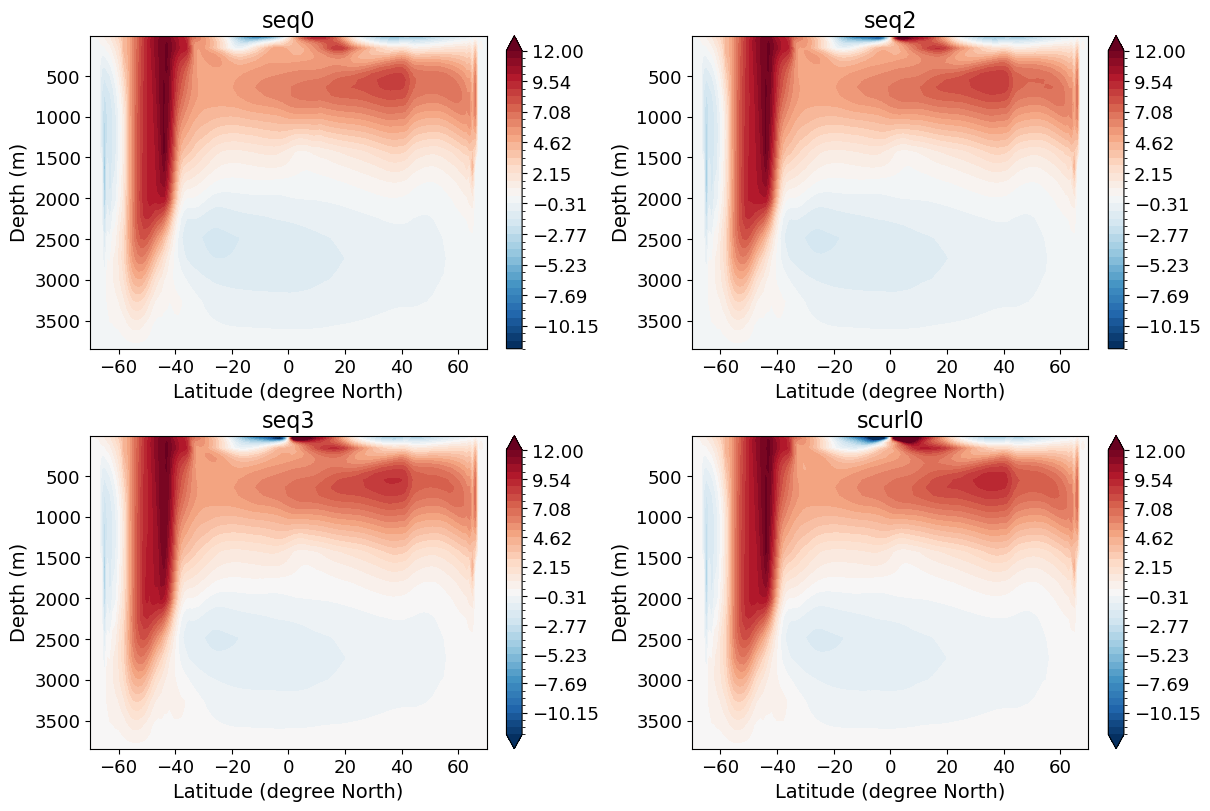

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

# Define datasets for easier plotting
datasets = [ds_seq0, ds_seq2, ds_seq3, ds_scurl0]
titles = ["seq0", "seq2", "seq3", "scurl0"]

# Loop through axes and datasets
for i, axis in enumerate(ax.flat):
    contour = (((datasets[i].vh).sum('xh').cumsum('zl')) * 10**-6).plot.contourf(
        ax=axis, levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
    )
    axis.set_title(titles[i], fontsize=16)
    axis.set_xlabel('Latitude (degree North)', fontsize=14)
    axis.set_ylabel('Depth (m)', fontsize=14)
    axis.tick_params(axis='both', labelsize=13)
    axis.invert_yaxis()
    
    # Add colorbars with custom fontsize
    cbar = fig.colorbar(contour, ax=axis, orientation='vertical')
    cbar.ax.tick_params(labelsize=13)
    cbar.ax.set_label('Volume Transport (Sv)')

plt.show()

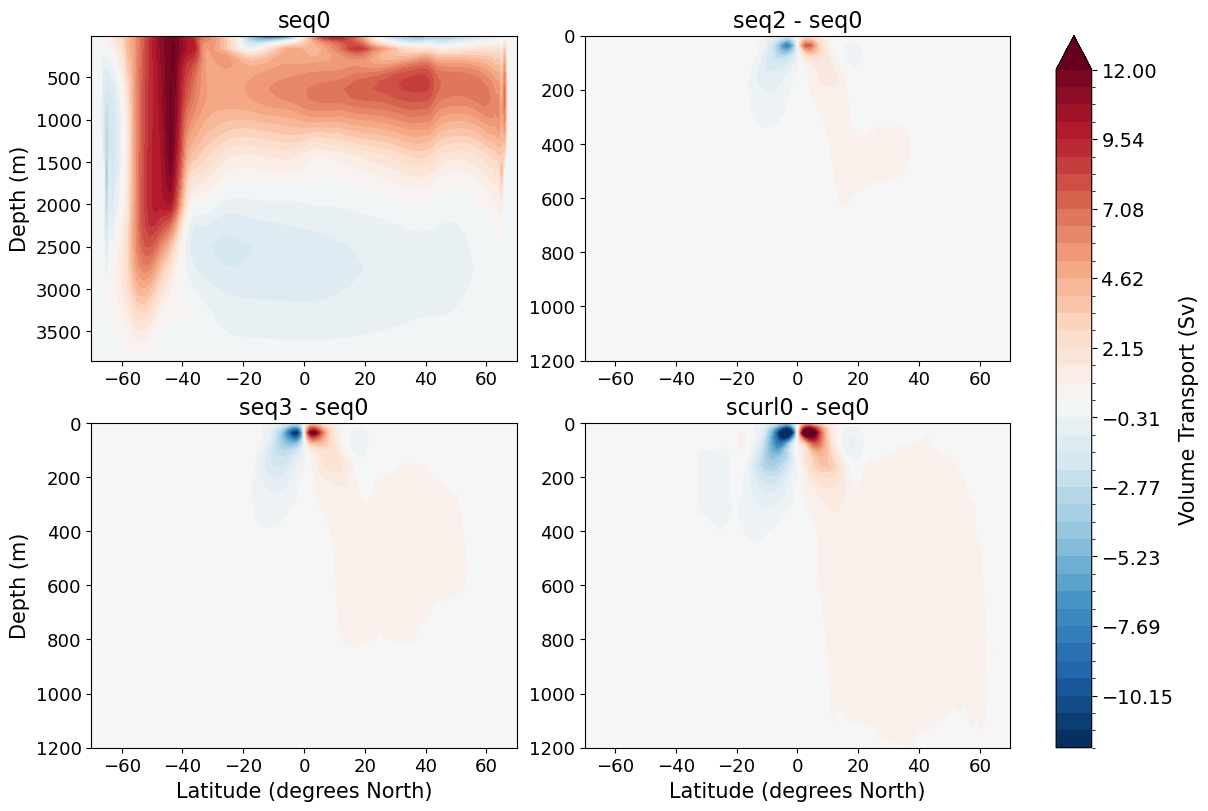

In [5]:
#Difference with the control run

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

# Plot data
contour0 = (((ds_seq0.vh).sum('xh').cumsum('zl')) * 10**-6).plot.contourf(
    ax=ax[0, 0], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
)
contour1 = ((((ds_seq2.vh).sum('xh').cumsum('zl')) * 10**-6) - (((ds_seq0.vh).sum('xh').cumsum('zl')) * 10**-6)).plot.contourf(
    ax=ax[0, 1], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
)
contour2 = ((((ds_seq3.vh).sum('xh').cumsum('zl')) * 10**-6) - (((ds_seq0.vh).sum('xh').cumsum('zl')) * 10**-6)).plot.contourf(
    ax=ax[1, 0], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
)
contour3 = ((((ds_scurl0.vh).sum('xh').cumsum('zl')) * 10**-6) - (((ds_seq0.vh).sum('xh').cumsum('zl')) * 10**-6)).plot.contourf(
    ax=ax[1, 1], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
)

contours=[contour0,contour1,contour2,contour3]
# Set titles
ax[0, 0].set_title("seq0", fontsize =16)
ax[0, 1].set_title("seq2 - seq0", fontsize =16)
ax[1, 1].set_title("scurl0 - seq0", fontsize =16)
ax[1, 0].set_title("seq3 - seq0", fontsize =16)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_xlabel("Latitude (degrees North)", fontsize = 15)


ax[0,0].set_ylabel("Depth (m)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Depth (m)", fontsize = 15)
ax[1,1].set_ylabel('')

# Invert y-axes
ax[0, 0].invert_yaxis()
ax[1, 0].invert_yaxis()
ax[0, 1].invert_yaxis()
ax[1, 1].invert_yaxis()

ax[1, 0].set_ylim(1200,0)
ax[0, 1].set_ylim(1200,0)
ax[1, 1].set_ylim(1200,0)

# Add a common colorbar
cbar = fig.colorbar(contours[0], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Volume Transport (Sv)', fontsize=15)  # Set the colorbar title

plt.show()

# Density Space 

(1028.0, 1022.0)

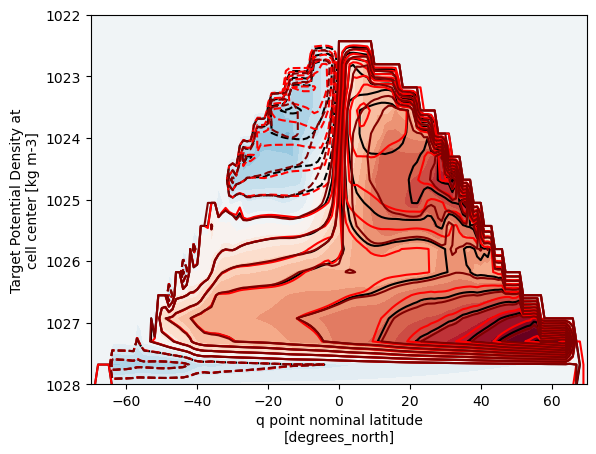

In [6]:
(((ds_seq0.vmo).sum('xh').cumsum('rho2_l')) * 10**-9).plot.contourf(levels=30, cmap='RdBu_r', vmax=12, add_colorbar=False)
c=np.linspace(-12,12,1)
(((ds_seq3.vmo).sum('xh').cumsum('rho2_l')) * 10**-9).plot.contour(levels=30, colors='black')
(((ds_scurl0.vmo).sum('xh').cumsum('rho2_l')) * 10**-9).plot.contour(levels=30, colors='red')
(((ds_seq2.vmo).sum('xh').cumsum('rho2_l')) * 10**-9).plot.contour(levels=30, colors='maroon')

plt.gca().invert_yaxis()
plt.gca().set_ylim(1028,1022)

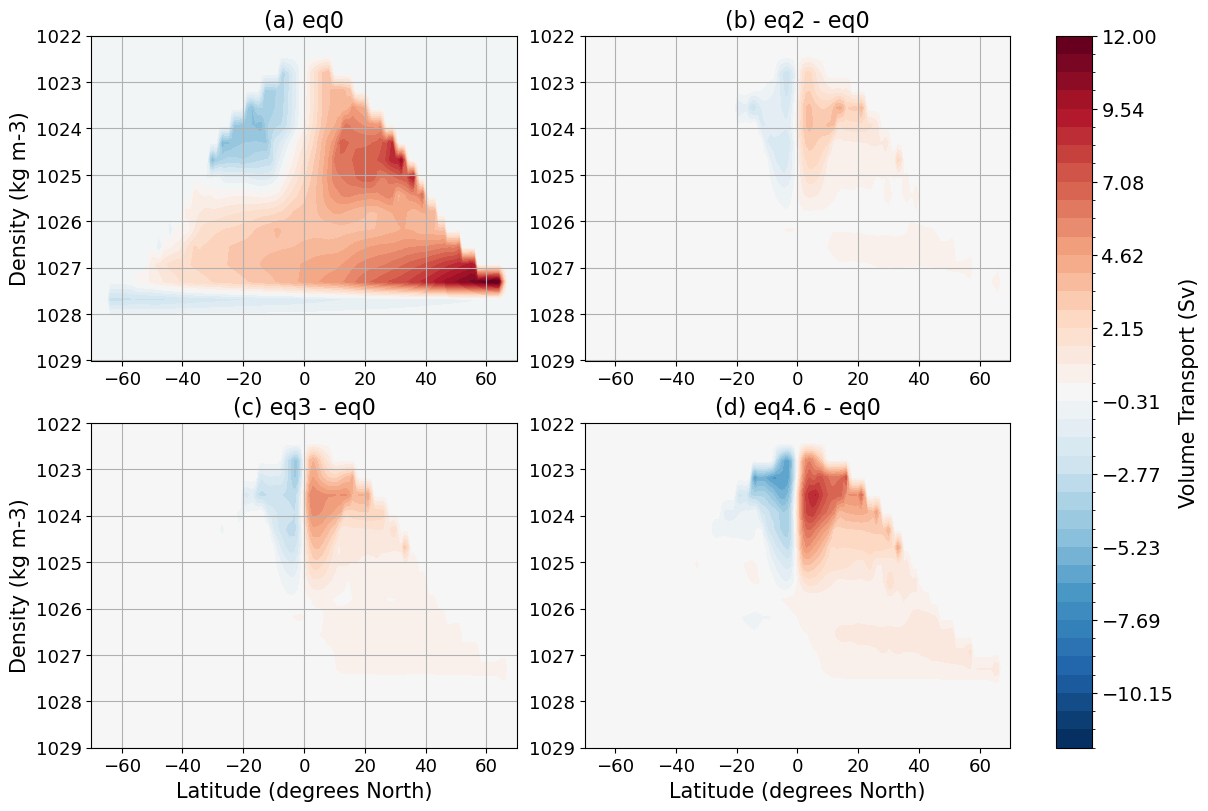

In [10]:
#Difference Plots
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))


contour0 = (((ds_eq0.vmo).sum('xh').cumsum('rho2_l')) * 10**-9).plot.contourf(
    ax=ax[0, 0], levels=40, cmap='RdBu_r',add_colorbar=False, vmax=12
)
contour1 = ((((ds_eq2.vmo).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_eq0.vmo).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[0, 1], levels=40, cmap='RdBu_r', add_colorbar=False, vmax=12
)
contour2 = ((((ds_eq3.vmo).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_eq0.vmo).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[1, 0], levels=40, cmap='RdBu_r', add_colorbar=False, vmax=12
)
contour3 = ((((ds_curl0.vmo).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_eq0.vmo).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[1, 1], levels=40, cmap='RdBu_r',add_colorbar=False, vmax=12
)

contours=[contour0,contour1,contour2,contour3]


ax[0, 0].set_title("(a) eq0", fontsize =16)
ax[0, 1].set_title("(b) eq2 - eq0", fontsize =16)
ax[1, 1].set_title("(d) eq4.6 - eq0", fontsize =16)
ax[1, 0].set_title("(c) eq3 - eq0", fontsize =16)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_xlabel("Latitude (degrees North)", fontsize = 15)


ax[0,0].set_ylabel("Density (kg m-3)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Density (kg m-3)", fontsize = 15)
ax[1,1].set_ylabel('')


ax[0, 0].invert_yaxis()
ax[1, 0].invert_yaxis()
ax[0, 1].invert_yaxis()
ax[1, 1].invert_yaxis()

ax[0, 0].set_ylim(1029,1022)
ax[1, 0].set_ylim(1029,1022)
ax[0, 1].set_ylim(1029,1022)
ax[1, 1].set_ylim(1029,1022)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1, 0].grid()
ax[1, 1].grid()


cbar = fig.colorbar(contours[3], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Volume Transport (Sv)', fontsize=15) 

plt.grid()
plt.show()

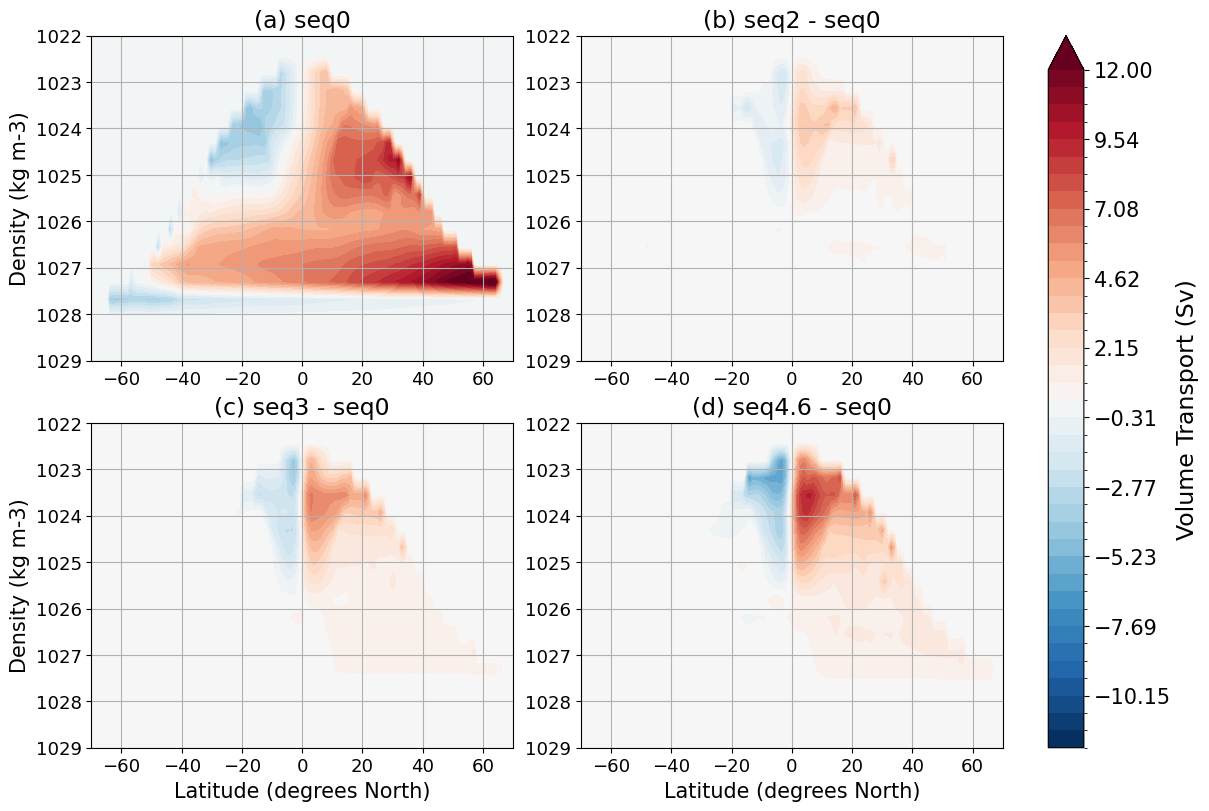

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

contour0 = (((ds_seq0.vmo).sum('xh').cumsum('rho2_l')) * 10**-9).plot.contourf(
    ax=ax[0, 0], levels=40, cmap='RdBu_r',add_colorbar=False, vmax=12
)
contour1 = ((((ds_seq2.vmo).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_seq0.vmo).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[0, 1], levels=40, cmap='RdBu_r', add_colorbar=False, vmax=12
)
contour2 = ((((ds_seq3.vmo).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_seq0.vmo).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[1, 0], levels=40, cmap='RdBu_r', add_colorbar=False, vmax=12
)
contour3 = ((((ds_scurl0.vmo).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_seq0.vmo).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[1, 1], levels=40, cmap='RdBu_r',add_colorbar=False, vmax=12
)

contours=[contour0,contour1,contour2,contour3]


ax[0, 0].set_title("(a) seq0", fontsize =17)
ax[0, 1].set_title("(b) seq2 - seq0", fontsize =17)
ax[1, 1].set_title("(d) seq4.6 - seq0", fontsize =17)
ax[1, 0].set_title("(c) seq3 - seq0", fontsize =17)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_xlabel("Latitude (degrees North)", fontsize = 15)


ax[0,0].set_ylabel("Density (kg m-3)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Density (kg m-3)", fontsize = 15)
ax[1,1].set_ylabel('')


ax[0, 0].invert_yaxis()
ax[1, 0].invert_yaxis()
ax[0, 1].invert_yaxis()
ax[1, 1].invert_yaxis()

ax[0, 0].set_ylim(1029,1022)
ax[1, 0].set_ylim(1029,1022)
ax[0, 1].set_ylim(1029,1022)
ax[1, 1].set_ylim(1029,1022)

# ax[0, 0].axvline(x=42.5)
# ax[0, 1].axvline(x=42.5)
# ax[1, 0].axvline(x=42.5)
# ax[1, 1].axvline(x=42.5)

# ax[0, 0].axvline(x=-30)
# ax[0, 1].axvline(x=-30)
# ax[1, 0].axvline(x=-30)
# ax[1, 1].axvline(x=-30)

ax[0, 0].grid()
ax[0, 1].grid()
ax[1, 0].grid()
ax[1, 1].grid()

cbar = fig.colorbar(contours[0], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Volume Transport (Sv)', fontsize=17) 

# plt.show()


# Flow at the equator

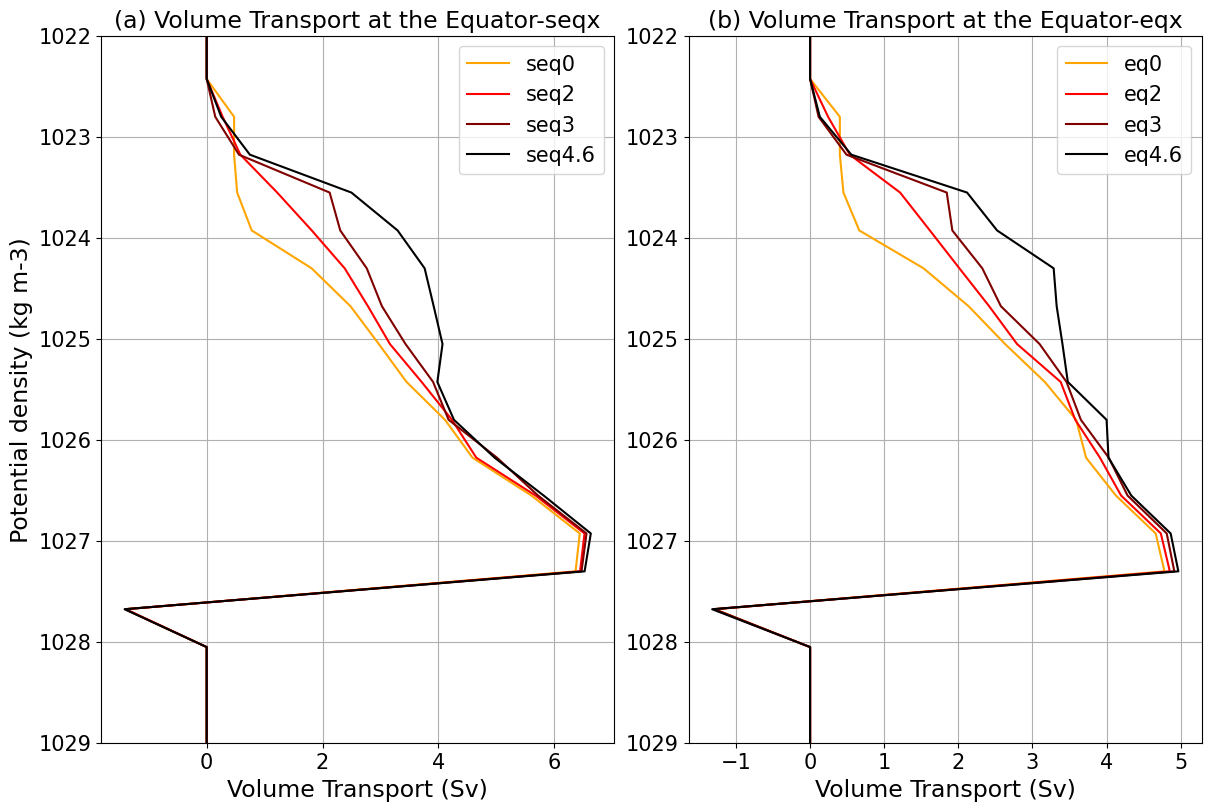

In [13]:
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,8))
(((ds_seq0.vmo).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "seq0", color = "orange", ax=ax[0])
(((ds_seq2.vmo).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "seq2", color = "red", ax=ax[0])
(((ds_seq3.vmo).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "seq3", color = "maroon", ax=ax[0])
(((ds_scurl0.vmo).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "seq4.6", color = "black", ax=ax[0])

(((ds_eq0.vmo).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "eq0", color = "orange", ax=ax[1])
(((ds_eq2.vmo).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "eq2", color = "red", ax=ax[1])
(((ds_eq3.vmo).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "eq3", color = "maroon", ax=ax[1])
(((ds_curl0.vmo).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "eq4.6", color = "black", ax=ax[1])

ax[0].set_title('(a) Volume Transport at the Equator-seqx', fontsize=17)
ax[0].set_ylabel('Potential density (kg m-3)', fontsize=17)
ax[0].set_xlabel('Volume Transport (Sv)', fontsize=17)

ax[1].set_title('(b) Volume Transport at the Equator-eqx', fontsize=17)
ax[1].set_ylabel('', fontsize=17)
ax[1].set_xlabel('Volume Transport (Sv)', fontsize=17)

ax[0].tick_params(axis='both', labelsize=15)
ax[0].set_ylim(1022,1029)
ax[0].legend(loc="upper right",fontsize=15)
ax[0].grid()
ax[0].invert_yaxis()


ax[1].tick_params(axis='both', labelsize=15)
ax[1].set_ylim(1022,1029)
ax[1].legend(loc="upper right",fontsize=15)
ax[1].grid()
ax[1].invert_yaxis()


# Miscellaneous - Flow at the Eastern Boundary

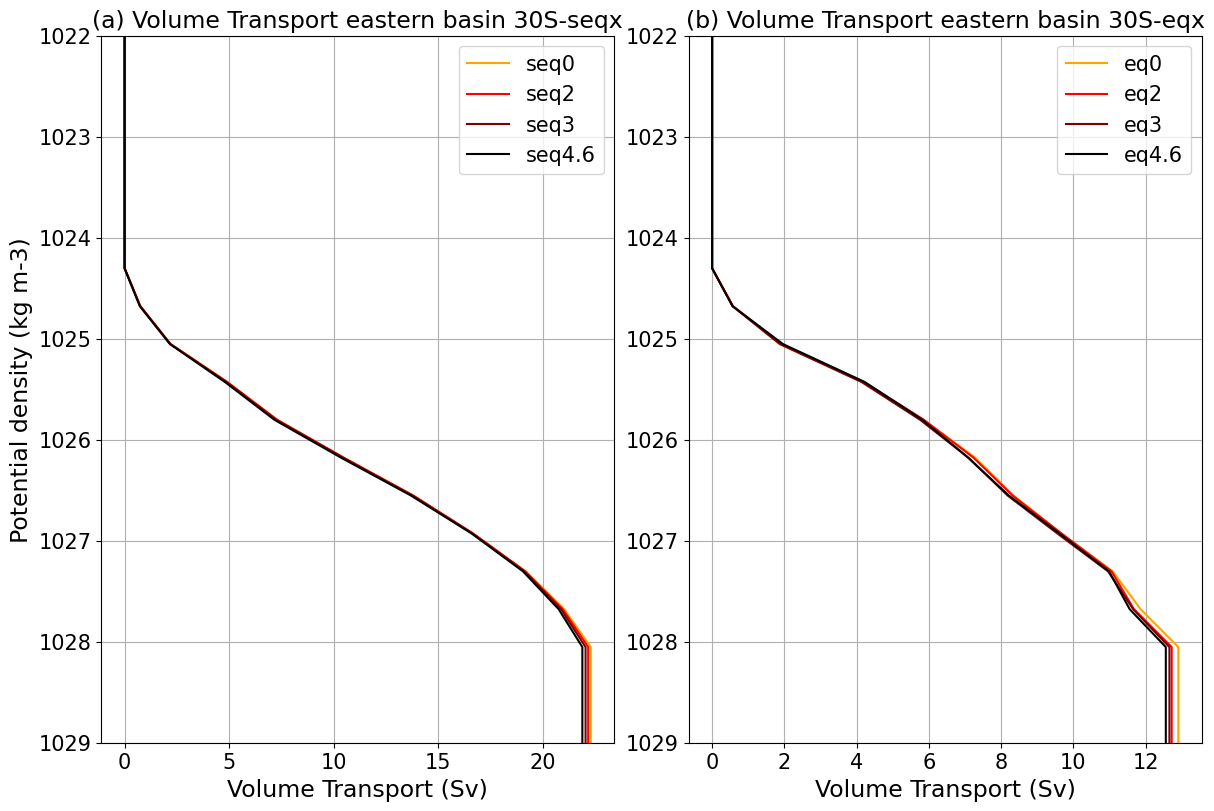

In [16]:
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,8))
(((ds_seq0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=40).plot(y='rho2_l',label = "seq0", color = "orange", ax=ax[0])
(((ds_seq2.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=40).plot(y='rho2_l',label = "seq2", color = "red", ax=ax[0])
(((ds_seq3.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=40).plot(y='rho2_l',label = "seq3", color = "maroon", ax=ax[0])
(((ds_scurl0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=40).plot(y='rho2_l',label = "seq4.6", color = "black", ax=ax[0])

(((ds_eq0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=40).plot(y='rho2_l',label = "eq0", color = "orange", ax=ax[1])
(((ds_eq2.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=40).plot(y='rho2_l',label = "eq2", color = "red", ax=ax[1])
(((ds_eq3.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=40).plot(y='rho2_l',label = "eq3", color = "maroon", ax=ax[1])
(((ds_curl0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=40).plot(y='rho2_l',label = "eq4.6", color = "black", ax=ax[1])

ax[0].set_title('(a) Volume Transport eastern basin 30S-seqx', fontsize=17)
ax[0].set_ylabel('Potential density (kg m-3)', fontsize=17)
ax[0].set_xlabel('Volume Transport (Sv)', fontsize=17)

ax[1].set_title('(b) Volume Transport eastern basin 30S-eqx', fontsize=17)
ax[1].set_ylabel('', fontsize=17)
ax[1].set_xlabel('Volume Transport (Sv)', fontsize=17)

ax[0].tick_params(axis='both', labelsize=15)
ax[0].set_ylim(1022,1029)
ax[0].legend(loc="upper right",fontsize=15)
ax[0].grid()
ax[0].invert_yaxis()


ax[1].tick_params(axis='both', labelsize=15)
ax[1].set_ylim(1022,1029)
ax[1].legend(loc="upper right",fontsize=15)
ax[1].grid()
ax[1].invert_yaxis()

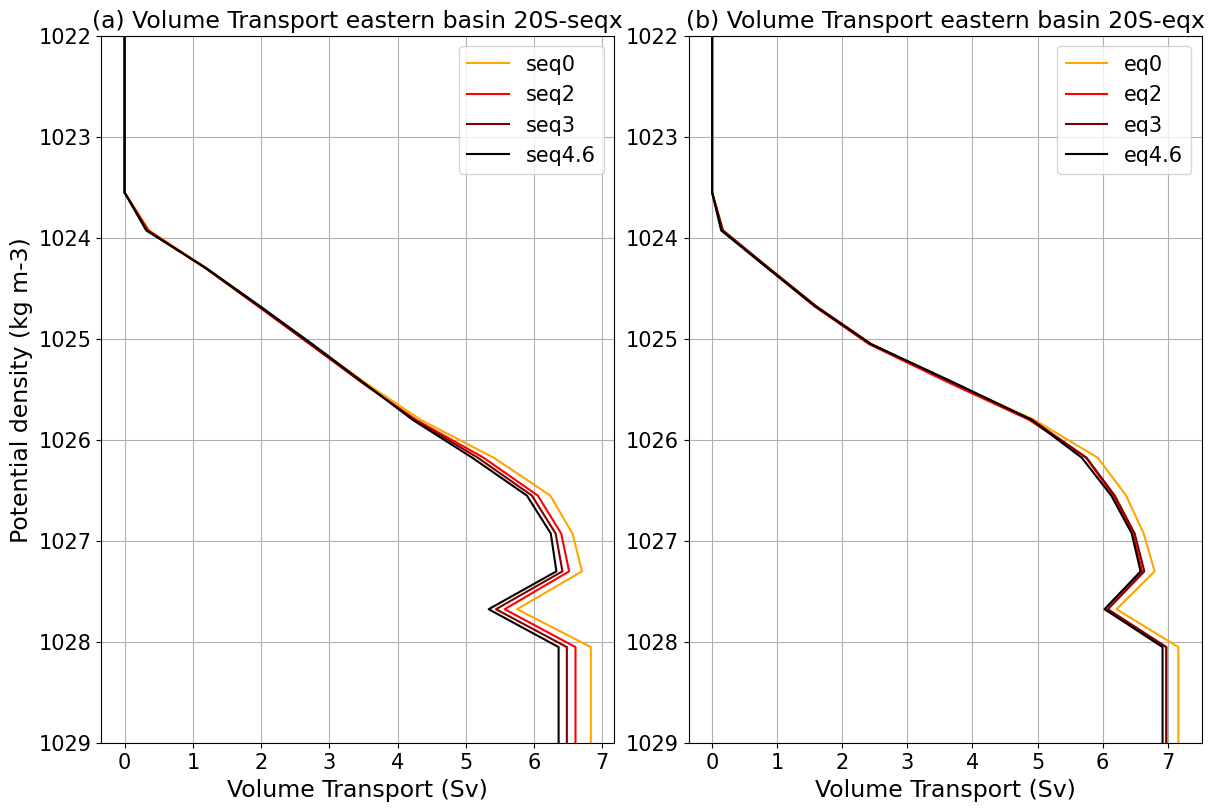

In [17]:
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,8))
(((ds_seq0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=50).plot(y='rho2_l',label = "seq0", color = "orange", ax=ax[0])
(((ds_seq2.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=50).plot(y='rho2_l',label = "seq2", color = "red", ax=ax[0])
(((ds_seq3.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=50).plot(y='rho2_l',label = "seq3", color = "maroon", ax=ax[0])
(((ds_scurl0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=50).plot(y='rho2_l',label = "seq4.6", color = "black", ax=ax[0])

(((ds_eq0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=50).plot(y='rho2_l',label = "eq0", color = "orange", ax=ax[1])
(((ds_eq2.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=50).plot(y='rho2_l',label = "eq2", color = "red", ax=ax[1])
(((ds_eq3.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=50).plot(y='rho2_l',label = "eq3", color = "maroon", ax=ax[1])
(((ds_curl0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=50).plot(y='rho2_l',label = "eq4.6", color = "black", ax=ax[1])

ax[0].set_title('(a) Volume Transport eastern basin 20S-seqx', fontsize=17)
ax[0].set_ylabel('Potential density (kg m-3)', fontsize=17)
ax[0].set_xlabel('Volume Transport (Sv)', fontsize=17)

ax[1].set_title('(b) Volume Transport eastern basin 20S-eqx', fontsize=17)
ax[1].set_ylabel('', fontsize=17)
ax[1].set_xlabel('Volume Transport (Sv)', fontsize=17)

# Increase tick label size
ax[0].tick_params(axis='both', labelsize=15)
ax[0].set_ylim(1022,1029)
ax[0].legend(loc="upper right",fontsize=15)
ax[0].grid()
ax[0].invert_yaxis()


ax[1].tick_params(axis='both', labelsize=15)
ax[1].set_ylim(1022,1029)
ax[1].legend(loc="upper right",fontsize=15)
ax[1].grid()
ax[1].invert_yaxis()


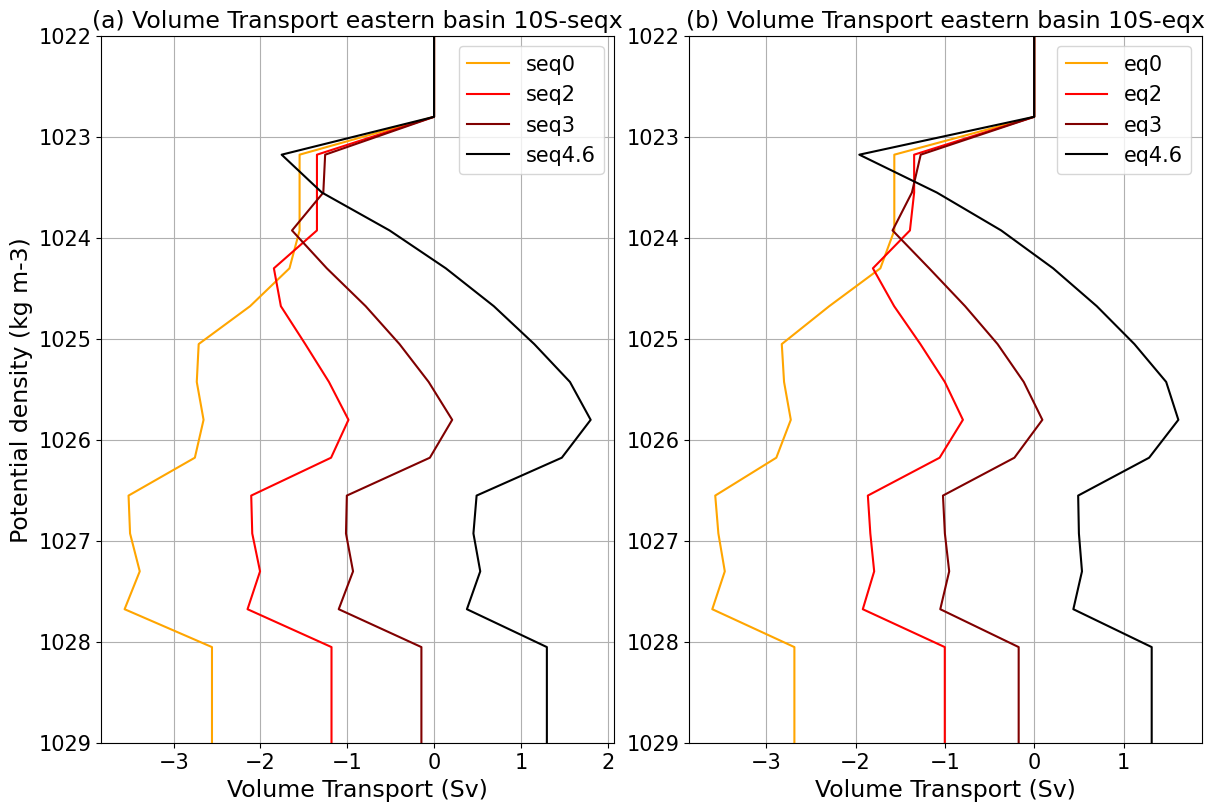

In [18]:
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,8))
(((ds_seq0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=60).plot(y='rho2_l',label = "seq0", color = "orange", ax=ax[0])
(((ds_seq2.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=60).plot(y='rho2_l',label = "seq2", color = "red", ax=ax[0])
(((ds_seq3.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=60).plot(y='rho2_l',label = "seq3", color = "maroon", ax=ax[0])
(((ds_scurl0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=60).plot(y='rho2_l',label = "seq4.6", color = "black", ax=ax[0])

(((ds_eq0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=60).plot(y='rho2_l',label = "eq0", color = "orange", ax=ax[1])
(((ds_eq2.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=60).plot(y='rho2_l',label = "eq2", color = "red", ax=ax[1])
(((ds_eq3.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=60).plot(y='rho2_l',label = "eq3", color = "maroon", ax=ax[1])
(((ds_curl0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=60).plot(y='rho2_l',label = "eq4.6", color = "black", ax=ax[1])

ax[0].set_title('(a) Volume Transport eastern basin 10S-seqx', fontsize=17)
ax[0].set_ylabel('Potential density (kg m-3)', fontsize=17)
ax[0].set_xlabel('Volume Transport (Sv)', fontsize=17)

ax[1].set_title('(b) Volume Transport eastern basin 10S-eqx', fontsize=17)
ax[1].set_ylabel('', fontsize=17)
ax[1].set_xlabel('Volume Transport (Sv)', fontsize=17)

# Increase tick label size
ax[0].tick_params(axis='both', labelsize=15)
ax[0].set_ylim(1022,1029)
ax[0].legend(loc="upper right",fontsize=15)
ax[0].grid()
ax[0].invert_yaxis()


ax[1].tick_params(axis='both', labelsize=15)
ax[1].set_ylim(1022,1029)
ax[1].legend(loc="upper right",fontsize=15)
ax[1].grid()
ax[1].invert_yaxis()

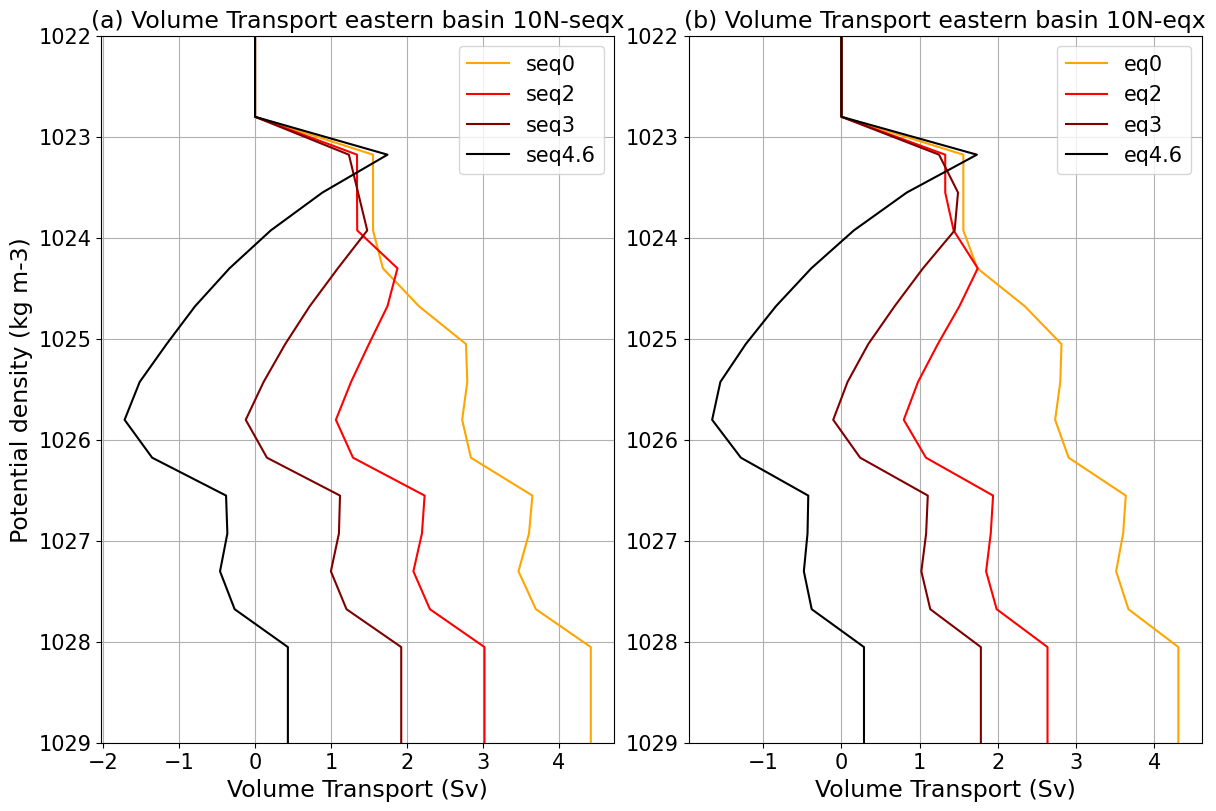

In [19]:
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,8))
(((ds_seq0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=80).plot(y='rho2_l',label = "seq0", color = "orange", ax=ax[0])
(((ds_seq2.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=80).plot(y='rho2_l',label = "seq2", color = "red", ax=ax[0])
(((ds_seq3.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=80).plot(y='rho2_l',label = "seq3", color = "maroon", ax=ax[0])
(((ds_scurl0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=80).plot(y='rho2_l',label = "seq4.6", color = "black", ax=ax[0])

(((ds_eq0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=80).plot(y='rho2_l',label = "eq0", color = "orange", ax=ax[1])
(((ds_eq2.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=80).plot(y='rho2_l',label = "eq2", color = "red", ax=ax[1])
(((ds_eq3.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=80).plot(y='rho2_l',label = "eq3", color = "maroon", ax=ax[1])
(((ds_curl0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=80).plot(y='rho2_l',label = "eq4.6", color = "black", ax=ax[1])

ax[0].set_title('(a) Volume Transport eastern basin 10N-seqx', fontsize=17)
ax[0].set_ylabel('Potential density (kg m-3)', fontsize=17)
ax[0].set_xlabel('Volume Transport (Sv)', fontsize=17)

ax[1].set_title('(b) Volume Transport eastern basin 10N-eqx', fontsize=17)
ax[1].set_ylabel('', fontsize=17)
ax[1].set_xlabel('Volume Transport (Sv)', fontsize=17)

# Increase tick label size
ax[0].tick_params(axis='both', labelsize=15)
ax[0].set_ylim(1022,1029)
ax[0].legend(loc="upper right",fontsize=15)
ax[0].grid()
ax[0].invert_yaxis()


ax[1].tick_params(axis='both', labelsize=15)
ax[1].set_ylim(1022,1029)
ax[1].legend(loc="upper right",fontsize=15)
ax[1].grid()
ax[1].invert_yaxis()

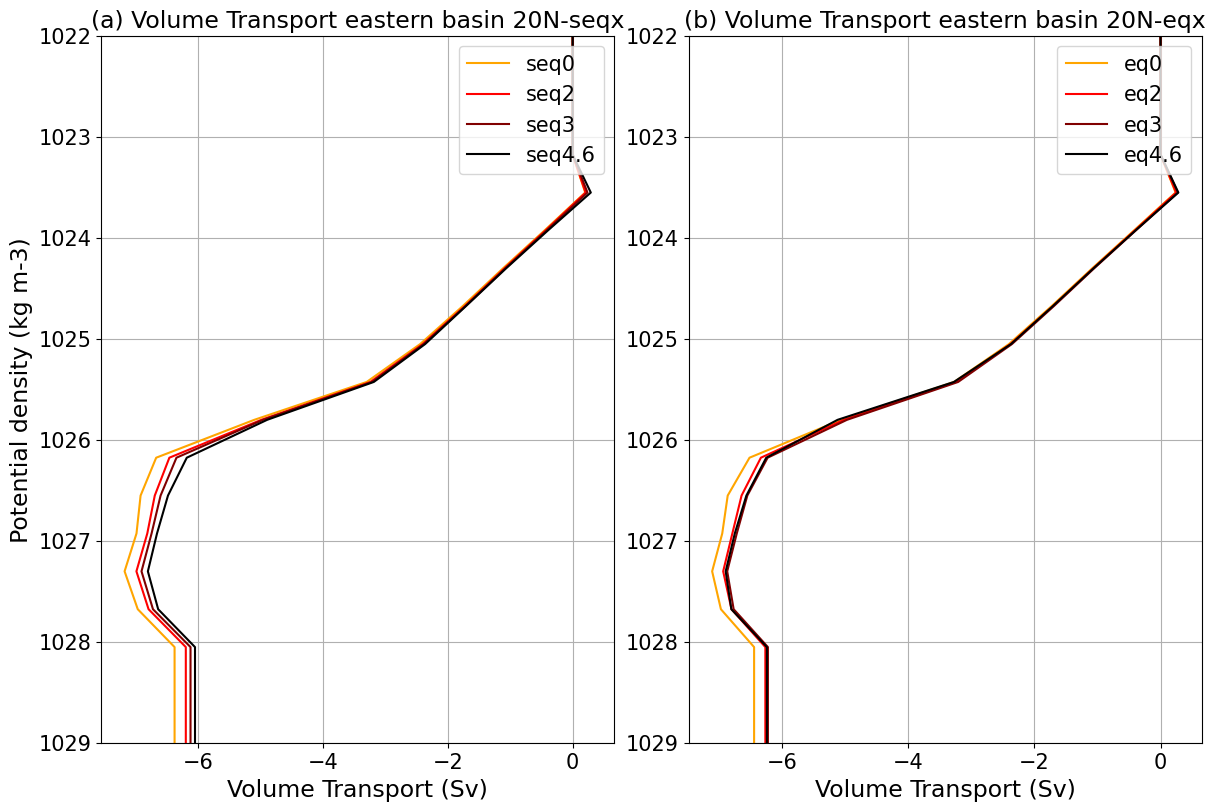

In [20]:
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,8))
(((ds_seq0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=90).plot(y='rho2_l',label = "seq0", color = "orange", ax=ax[0])
(((ds_seq2.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=90).plot(y='rho2_l',label = "seq2", color = "red", ax=ax[0])
(((ds_seq3.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=90).plot(y='rho2_l',label = "seq3", color = "maroon", ax=ax[0])
(((ds_scurl0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=90).plot(y='rho2_l',label = "seq4.6", color = "black", ax=ax[0])

(((ds_eq0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=90).plot(y='rho2_l',label = "eq0", color = "orange", ax=ax[1])
(((ds_eq2.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=90).plot(y='rho2_l',label = "eq2", color = "red", ax=ax[1])
(((ds_eq3.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=90).plot(y='rho2_l',label = "eq3", color = "maroon", ax=ax[1])
(((ds_curl0.vmo).sel(xh=slice(50.5,79.5)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=90).plot(y='rho2_l',label = "eq4.6", color = "black", ax=ax[1])

ax[0].set_title('(a) Volume Transport eastern basin 20N-seqx', fontsize=17)
ax[0].set_ylabel('Potential density (kg m-3)', fontsize=17)
ax[0].set_xlabel('Volume Transport (Sv)', fontsize=17)

ax[1].set_title('(b) Volume Transport eastern basin 20N-eqx', fontsize=17)
ax[1].set_ylabel('', fontsize=17)
ax[1].set_xlabel('Volume Transport (Sv)', fontsize=17)

# Increase tick label size
ax[0].tick_params(axis='both', labelsize=15)
ax[0].set_ylim(1022,1029)
ax[0].legend(loc="upper right",fontsize=15)
ax[0].grid()
ax[0].invert_yaxis()


ax[1].tick_params(axis='both', labelsize=15)
ax[1].set_ylim(1022,1029)
ax[1].legend(loc="upper right",fontsize=15)
ax[1].grid()
ax[1].invert_yaxis()